# Multivariable Linear Regression
With simple linear regression, we have one independent and one dependent variable. These relationships are easy to plot and visualize on a graph. However, with real-world situations, there are often multiple factors that affect an outcome. This can make it difficult to visualize the relationships between the variables. A possible solution is to use some form of a decision tree, which, after splitting and pruning, will provide a much more intuitive explanation. Nevertheless, we explore the algorithm of multivariable linear regression using gradient descent in this Jupyter Notebook, attempting to find a linear relationship between the independent and dependent variables.

It is important to note that there is a difference between multivaria**BLE** and multivaria**TE** regression. Multivariable regression uses multiple predictor variables but only **ONE** outcome variable while multivariate regression has multiple outcome variables.

## Libraries
For this implementation, we will use pandas to read in data from CSV files, NumPy arrays for fast calculations, scikit-learn to split our data into training and validation sets, and matplotlib to visualize the process. Although the pandas DataFrames can be used directly throughout the gradient descent (by converting extracted rows to NumPy arrays), converting them to NumPy arrays before applying the regression will greatly decrease computation time (especially for large data sets) because indexing for DataFrames is quite slow.

In [10]:
# Library imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Functions
This section includes the functions necessary for data processing, error calculation, and gradient descent iteration.

### Data Processing
Linear regression does not require normalization of the values, but doing this decreases the chances of overflowing the capacity of a float in Python due to high error from large values. Min-Max Normalization will be sufficient in this example, independently performing it on each variable, linearly scaling values between the minimums and maximums of their respective columns.

$$v_{new}=\frac{v_{old}-min(v_{old})}{max(v_{old})-min(v_{old})}$$

Since the minimums and maximums may not be defined and included in the data, we need to be able to reverse this in order to put the predicted values into a readable, comprehensible form. Therefore, these extremes are returned by the `normalize_minmax` function to be saved and used by the `denorm` function after iteration.

In [ ]:
def normalize_minmax(data):
    # Find the min and max for each column
    mins = data.min(axis=0)
    maxs = data.max(axis=0)
    # Normalize values
    data = (data - mins) / (maxs - mins)
    return data, mins, maxs

def denorm(pred, mins, maxs, col):
    return pred * (maxs[col] - mins[col]) + mins[col]

### Gradient Descent
The `predict` function not only serves to reduce redundancy in the other functions found in this section but also to provide a method to use the model to predict new data points, using the equation below. $\hat{y}$ is the predicted outcome variable, $x_i$ are the predictor variables, and $\beta_i$ are the values we will adjust to reduce the error.

$$\hat{y}=\beta_0+\beta_1x_1+\beta_2x_2+\ldots+\beta_nx_n$$

In [1]:
def predict(point, betas):
    return betas[0] + np.dot(betas[1:], point.T)

For linear regression, we will use mean squared error as the cost function, represented by the following equation. Choosing a good cost function to perform regression with is important because we want to use one that has only one local minimum, which is the global minimum.

$$J=\frac{1}{n}\sum_{i=1}^{n} (y_i-\hat{y_i})^2$$

In [ ]:
def mse(data, betas):
    rows, cols = data.shape
    loss = 0
    for i in range(rows):
        loss += pow(data[i][cols - 1] - predict(data[i][:cols - 1], betas), 2)
    loss *= 1 / rows
    return loss

The `iterate` function contains the actual gradient descent iteration.

#### Conceptual Visualization
Imagine you are on a hill and are trying to get to the bottom. However, there is a problem—you are blindfolded and don't know where the bottom is. Therefore, you feel the ground close to you. The left slopes up, in front slopes up, same with behind. On the other hand, the right slopes down, so what direction should you step in? The right. You keep repeating this process until you are essentially at your destination, the bottom of the hill. At a single moment in time, a single position, you know which direction the hill slants. We can use this information to decide where to advance. Although this visualization is not completely accurate, this is essentially how gradient descent works.

#### Algorithm
With gradient descent, the aim is to minimize the cost function. In other words, we want to improve each of the $\beta$-values to a state where the cost is at its global minimum. To calculate these new values, we use the equation below, where $J$ represents the cost function, defined above.

$$\beta_i_{new}=\beta_i_{old}-\alpha\frac{\partial J}{\partial \beta_i}$$

In [159]:
def iterate(data_train, data_test, betas, epochs, learning_rate):
    metrics = {
        'loss_train': [mse(data_train, betas)],
        'loss_test': [mse(data_test, betas)],
    }
    rows, cols = data_train.shape
    for k in range(epochs):
        dbetas = np.zeros(len(betas))
        for i in range(rows):
            temp = data_train[i][cols - 1] - predict(data_train[i][:cols - 1], betas)
            dbetas[0] += temp
            dbetas[1:] += temp * data_train[i][:cols - 1]
        dbetas *= -2 / rows
        betas -= dbetas * learning_rate
        metrics['loss_train'].append(mse(data_train, betas))
        metrics['loss_test'].append(mse(data_test, betas))
    return metrics

## Examples
Now that the linear regression with gradient descent iteration is defined, we can test it on data.

In [102]:
data = pd.read_csv('linreg_data.csv').to_numpy()
train, test = train_test_split(data, test_size=0.1, shuffle=True)

In [103]:
eps = 100
lr = 0.06
betas = np.zeros(train.shape[1])

metrics = iterate(train, test, betas, eps, lr)

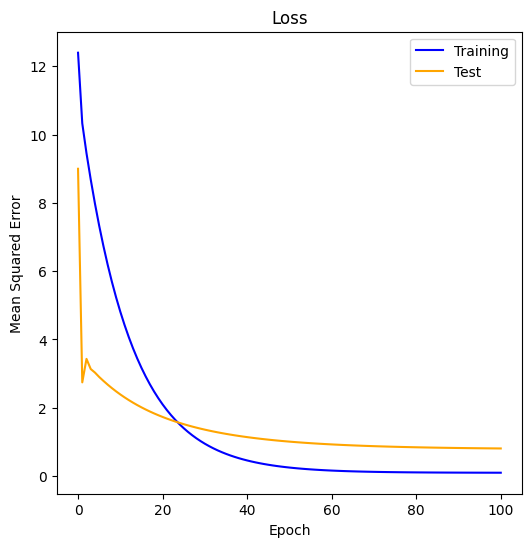

In [104]:
plt.figure(figsize=(6, 6))
plt.plot(range(eps + 1), metrics['loss_train'], c='blue', label='Training')
plt.plot(range(eps + 1), metrics['loss_test'], c='orange', label='Test')
plt.legend(loc='upper right')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

In [106]:
print(metrics['loss_train'][eps])
print(metrics['loss_test'][eps])

0.09514829417534772
0.805979062469517


In [145]:
wine_red = pd.read_csv('winequality-red.csv', sep=';')
wine_red, denorm_min, denorm_max = normalize_minmax(wine_red)
print(wine_red.head(10))
wine_red = wine_red.to_numpy()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   
5       0.247788          0.369863         0.00        0.061644   0.105175   
6       0.292035          0.328767         0.06        0.047945   0.095159   
7       0.238938          0.363014         0.00        0.020548   0.088481   
8       0.283186          0.315068         0.02        0.075342   0.101836   
9       0.256637          0.260274         0.36        0.356164   0.098497   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.6062

In [170]:
betas = np.zeros(wine_red.shape[1])
eps = 1000
lr = 0.2

train, test = train_test_split(wine_red, test_size=0.1, shuffle=True)
metrics = iterate(train, test, betas, eps, lr)

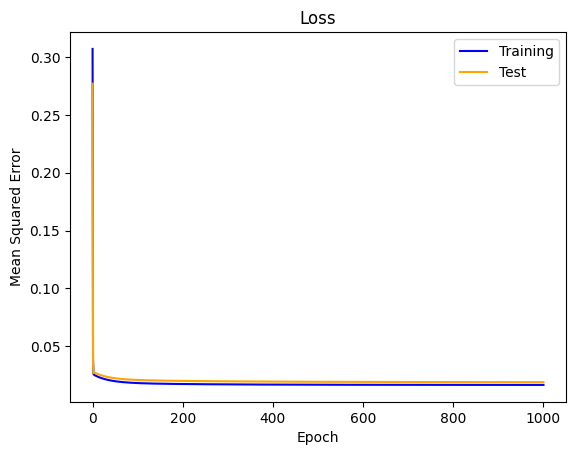

In [171]:
plt.plot(range(eps + 1), metrics['loss_train'], c='blue', label='Training')
plt.plot(range(eps + 1), metrics['loss_test'], c='orange', label='Test')
plt.legend(loc='upper right')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

In [172]:
print(metrics['loss_train'][eps])
print(metrics['loss_test'][eps])

0.016496393911153977
0.018887742001007835


In [187]:
pred = 8
print(test[pred][test.shape[1] - 1])
print(predict(test[pred][:test.shape[1] - 1], betas))
print(denorm(test[pred][test.shape[1] - 1], denorm_min, denorm_max, 'quality'))
print(denorm(predict(test[pred][:test.shape[1] - 1], betas), denorm_min, denorm_max, 'quality'))

0.4
0.45382231167371584
5.0
5.269111558368579
